# Quary 2.1

Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe. Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is. Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock This would be helpful if we are to train our model to take NLP inputs.

In [122]:
import pandas as pd
from datetime import datetime
from functools import partial
df = pd.read_csv("week2.csv")#loading week2.csv file
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,...,271952,1.388005e+08,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
1,1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,...,207011,1.061317e+08,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change
2,2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,...,391401,2.004375e+08,13341,150098,38.35,5,2017,508.495948,-0.009681,Slight or No change
3,3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,...,852336,4.309377e+08,18513,170919,20.05,5,2017,500.779579,-0.026563,Slight or No change
4,4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,...,352273,1.748782e+08,8326,57853,16.42,5,2017,500.222798,0.009333,Slight or No change


In [123]:
del df['Unnamed: 0']
duplicate_df = df
df.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change
2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,508.495948,-0.009681,Slight or No change
3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,500.779579,-0.026563,Slight or No change
4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,500.222798,0.009333,Slight or No change
5,MINDTREE,EQ,22-May-2017,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,5,2017,500.566573,0.009749,Slight or No change
6,MINDTREE,EQ,23-May-2017,502.35,504.00,507.45,491.00,498.00,501.15,498.72,452893,2.258664e+08,8567,198703,43.87,5,2017,500.656820,-0.002389,Slight or No change
7,MINDTREE,EQ,24-May-2017,501.15,502.00,515.00,494.05,511.95,509.95,506.72,823967,4.175211e+08,15083,351179,42.62,5,2017,502.697776,0.017560,Slight or No change
8,MINDTREE,EQ,25-May-2017,509.95,513.70,549.50,508.45,542.50,543.90,532.14,1632427,8.686829e+08,25072,693340,42.47,5,2017,515.189734,0.066575,Slight or No change
9,MINDTREE,EQ,26-May-2017,543.90,540.00,544.00,532.00,533.45,535.20,537.15,461613,2.479538e+08,12606,113087,24.50,5,2017,516.769830,-0.015996,Slight or No change


In [124]:
df.Date.dtype #the type of the Date column

dtype('O')

In [125]:
df['Date'] = pd.to_datetime(df['Date'])
df.Date.dtype

dtype('<M8[ns]')

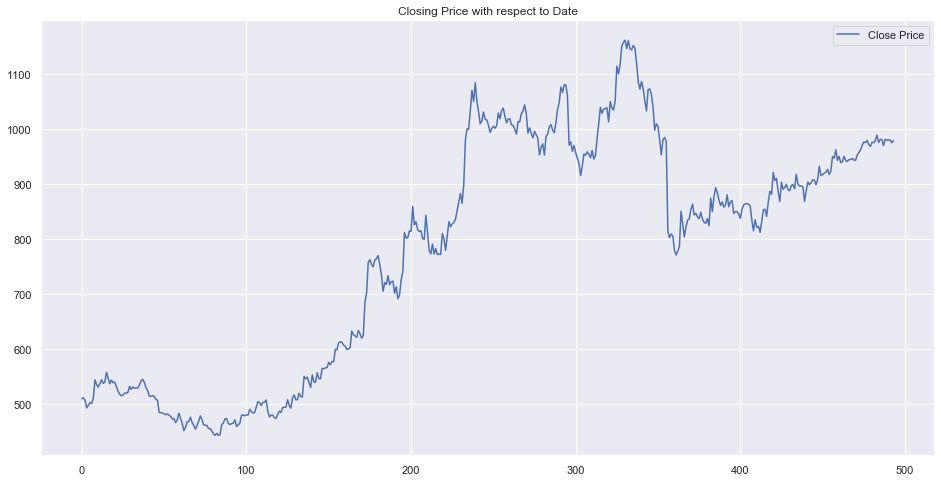

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Close Price'].plot(label = 'Close Price',figsize=(16,8),title='Closing Price with respect to Date')
plt.legend()

In [127]:
df['Close Price'].diff().abs().sort_values(ascending = False)


356    164.05
296     90.65
233     82.25
196     71.20
364     64.70
        ...  
398      0.05
48       0.05
491      0.05
34       0.05
0         NaN
Name: Close Price, Length: 494, dtype: float64

# Query 2.2


A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

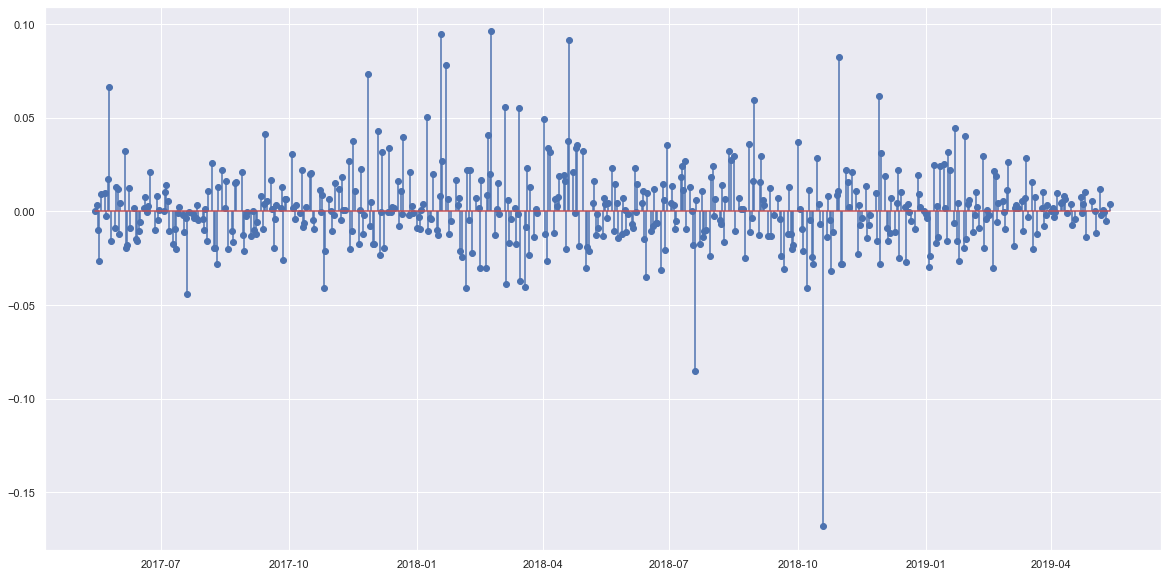

In [128]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
plt.stem(df['Date'],df['Day_Perc_Change'],use_line_collection =True)

# Query 2.3

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change.

In [129]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,MINDTREE,EQ,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change
2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,508.495948,-0.009681,Slight or No change
3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,500.779579,-0.026563,Slight or No change
4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,500.222798,0.009333,Slight or No change


<StemContainer object of 3 artists>

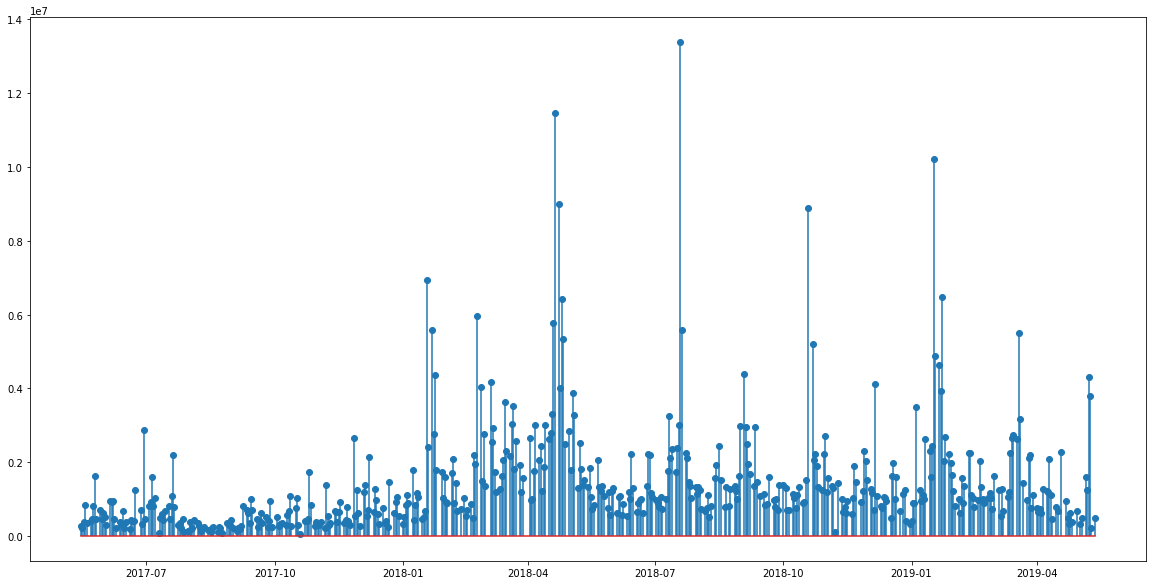

In [10]:
plt.figure(figsize=(20,10))
plt.stem(df['Date'],df['Total Traded Quantity'],use_line_collection =True)

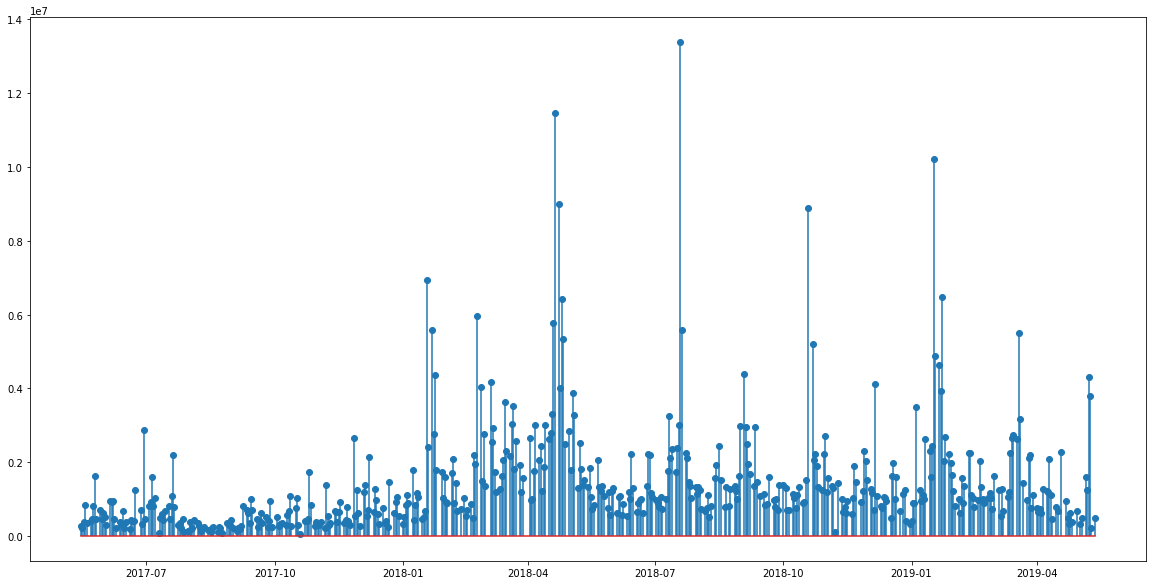

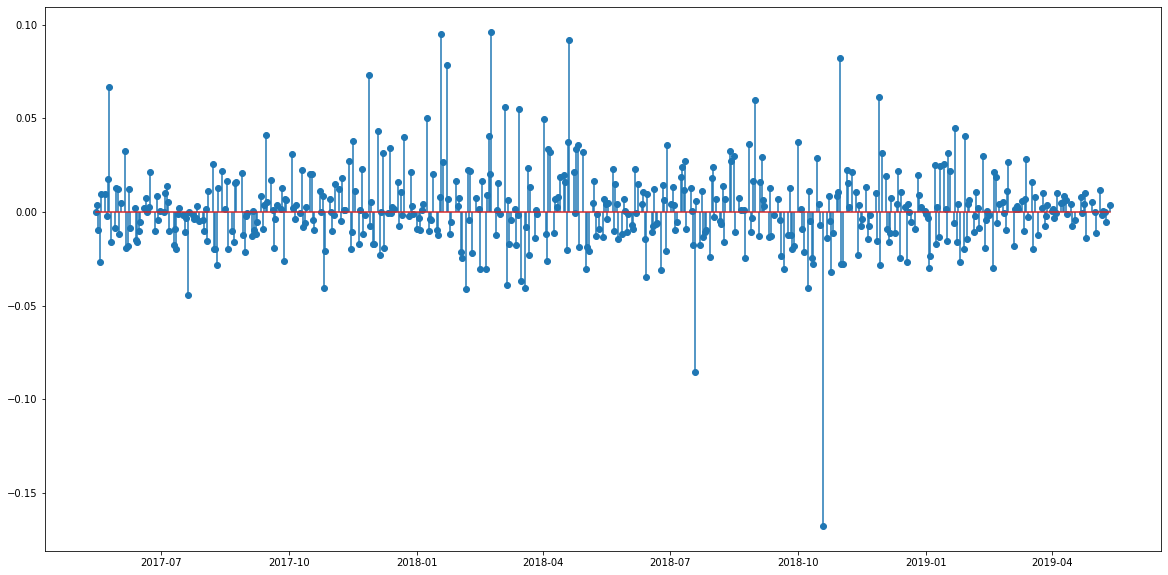

In [11]:
plt.figure(figsize=(20,10))
plt.stem(df['Date'],df['Total Traded Quantity'],use_line_collection =True)
plt.show()
plt.figure(figsize=(20,10))
plt.stem(df['Date'],df['Day_Perc_Change'],use_line_collection =True)
plt.show()


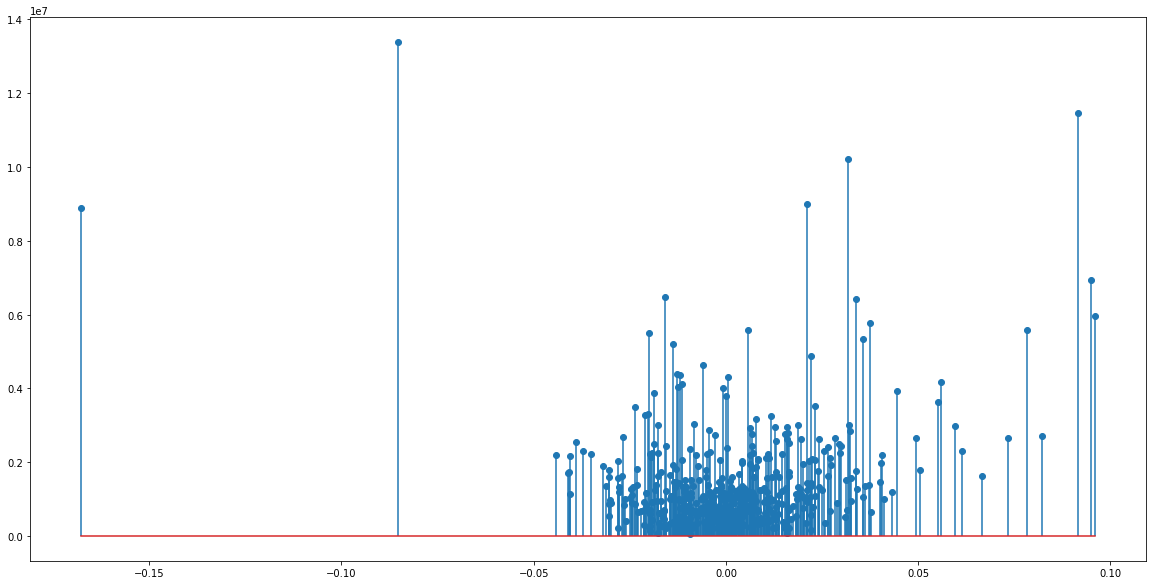

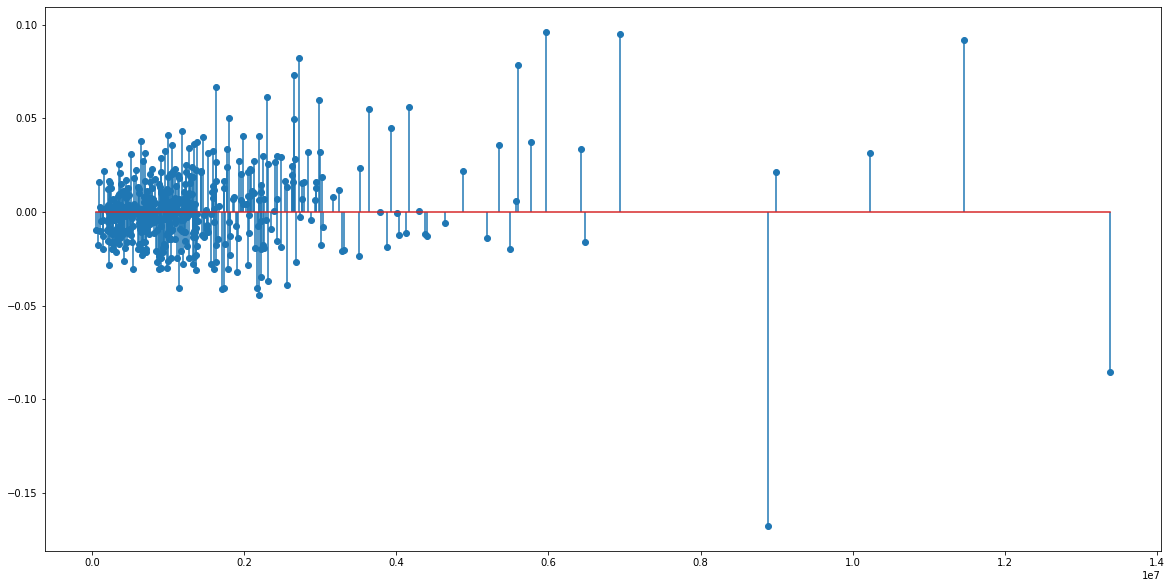

In [12]:
plt.figure(figsize=(20,10))
plt.stem(df['Day_Perc_Change'],df['Total Traded Quantity'],use_line_collection =True)
plt.show()
plt.figure(figsize=(20,10))
plt.stem(df['Total Traded Quantity'],df['Day_Perc_Change'],use_line_collection =True)
plt.show()

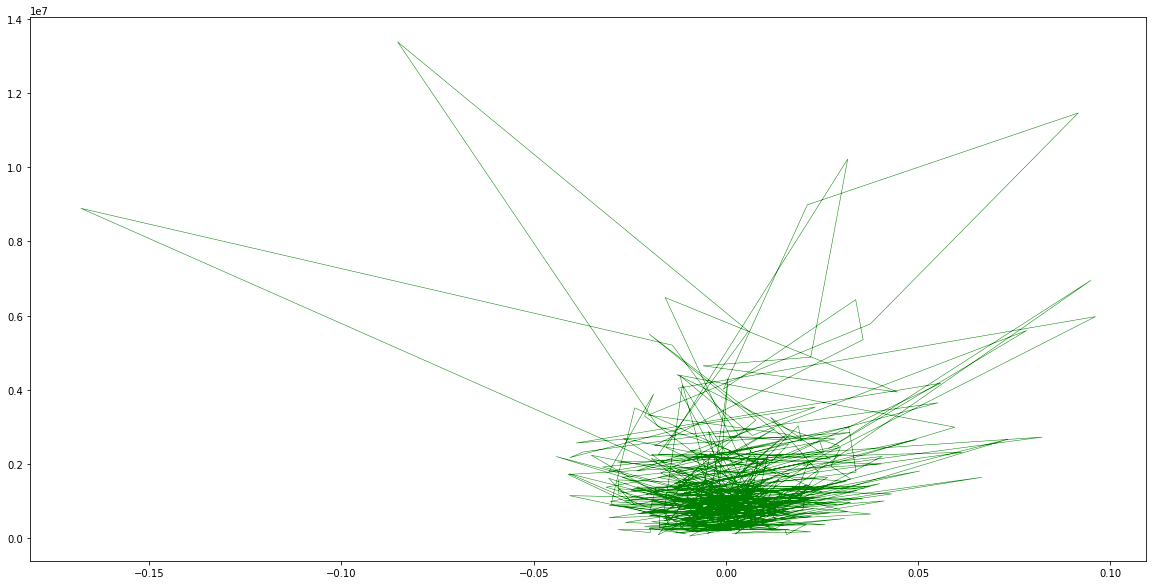

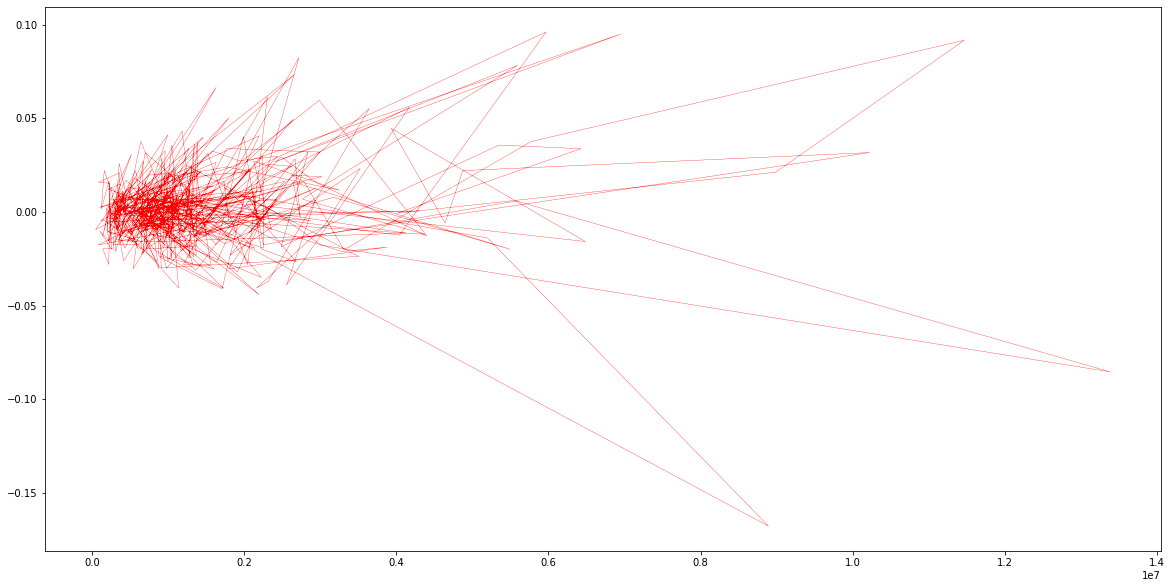

In [13]:
plt.figure(figsize=(20,10))#simple line plot comparision
plt.plot(df['Day_Perc_Change'],df['Total Traded Quantity'],color = 'Green',linewidth =0.5)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(df['Total Traded Quantity'],df['Day_Perc_Change'],color = 'Red',linewidth= 0.3)
plt.show()

# Quary 2.4

We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

Trendsare = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trend_to_list = df['Trend'].tolist()
counts = Counter(Trend_to_list)
counts

Counter({'Slight or No change': 494})

In [15]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,MINDTREE,EQ,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change
2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,508.495948,-0.009681,Slight or No change
3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,500.779579,-0.026563,Slight or No change
4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,500.222798,0.009333,Slight or No change


In [16]:
df.tail(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
491,MINDTREE,EQ,2019-05-09,980.50,979.6,983.15,976.1,980.9,980.45,980.02,3787159,3.711482e+09,8159,3479880,91.89,5,2019,858.098293,-0.000051,Slight or No change
492,MINDTREE,EQ,2019-05-10,980.45,980.4,982.90,973.0,974.0,975.35,977.55,215170,2.103396e+08,5128,26734,12.42,5,2019,858.135098,-0.005202,Slight or No change
493,MINDTREE,EQ,2019-05-13,975.35,973.4,983.00,970.3,981.0,979.10,980.16,485941,4.762997e+08,14005,222691,45.83,5,2019,858.220789,0.003845,Slight or No change


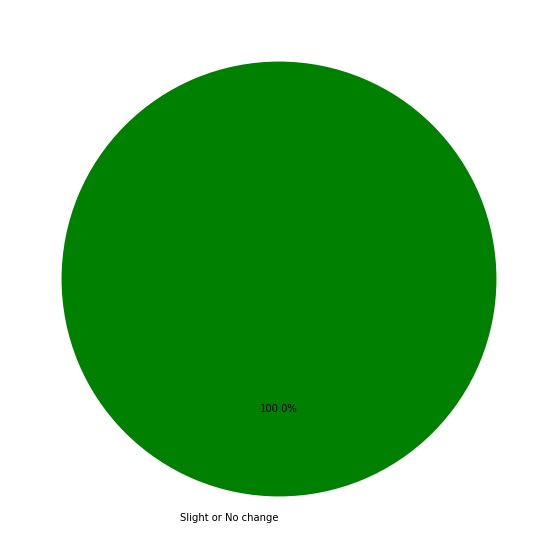

In [17]:
counter = [494]
labels= ['Slight or No change']
colors = ['Green']
plt.figure(figsize=(20,10))
plt.pie(counter, labels=labels,colors=colors,startangle=90, autopct='%.1f%%')
plt.show()

In [18]:
import matplotlib.pyplot as plt
Tolat_Trand_Quality = df.groupby(['Trend'])['Total Traded Quantity']
Tolat_Trand_Quality.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,494.0,1.388615e+06,1.450169e+06,46300.0,572476.25,1006586.5,1631997.25,13385207.0


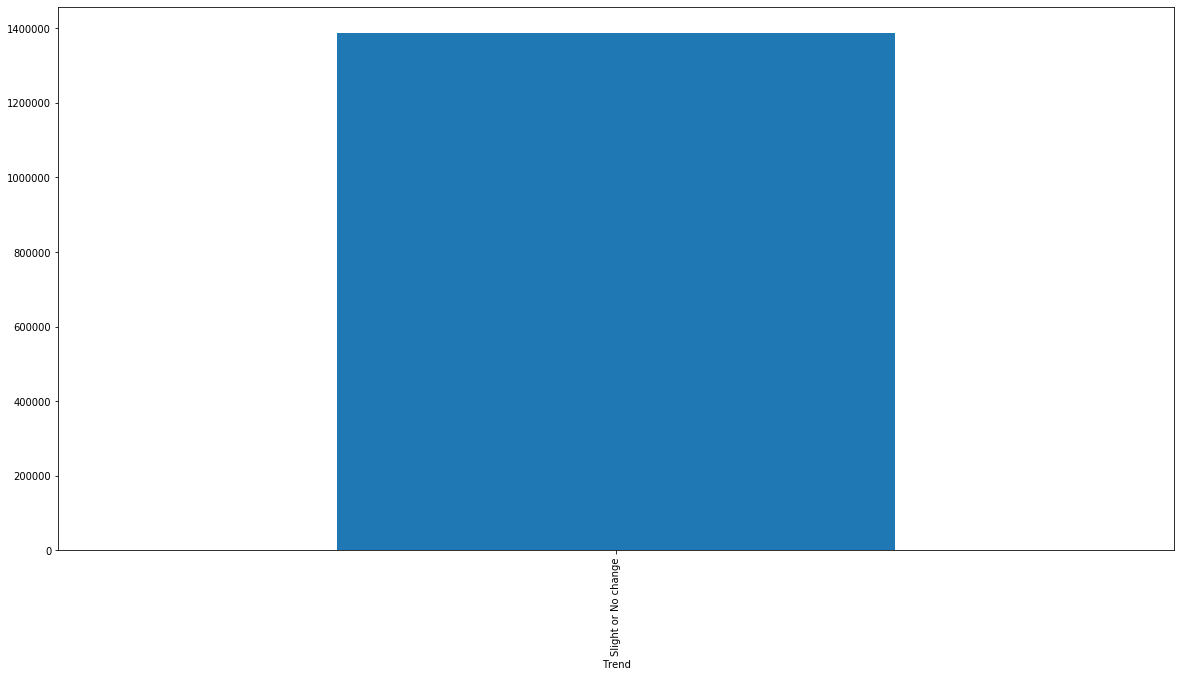

In [19]:
plt.figure(figsize=(20,10))
df.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar() # for mean value bar plt

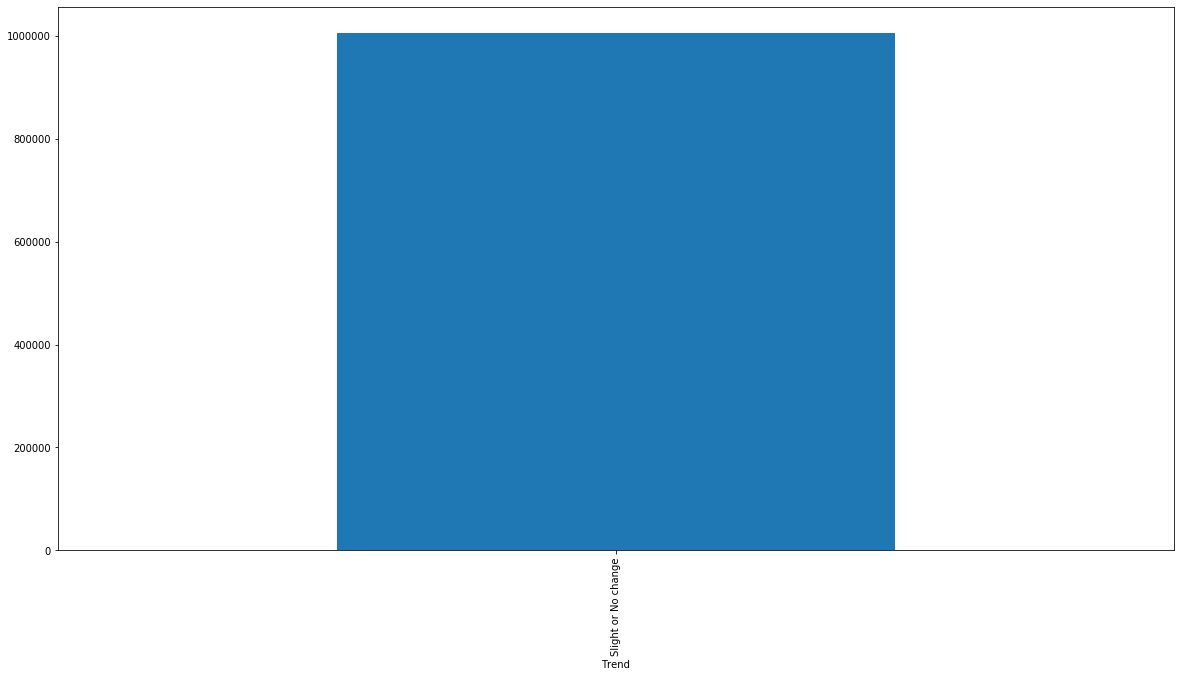

In [20]:
plt.figure(figsize=(20,10))
df.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar() #for meadian bar plot

# Query 2.5

Plot the daily return (percentage) distribution as a histogram. Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   7.,  29.,
        100., 159., 114.,  47.,  22.,   5.,   3.,   3.,   3.]),
 array([-0.16774886, -0.15455515, -0.14136145, -0.12816774, -0.11497403,
        -0.10178033, -0.08858662, -0.07539291, -0.0621992 , -0.0490055 ,
        -0.03581179, -0.02261808, -0.00942437,  0.00376933,  0.01696304,
         0.03015675,  0.04335046,  0.05654416,  0.06973787,  0.08293158,
         0.09612529]),
 <a list of 20 Patch objects>)

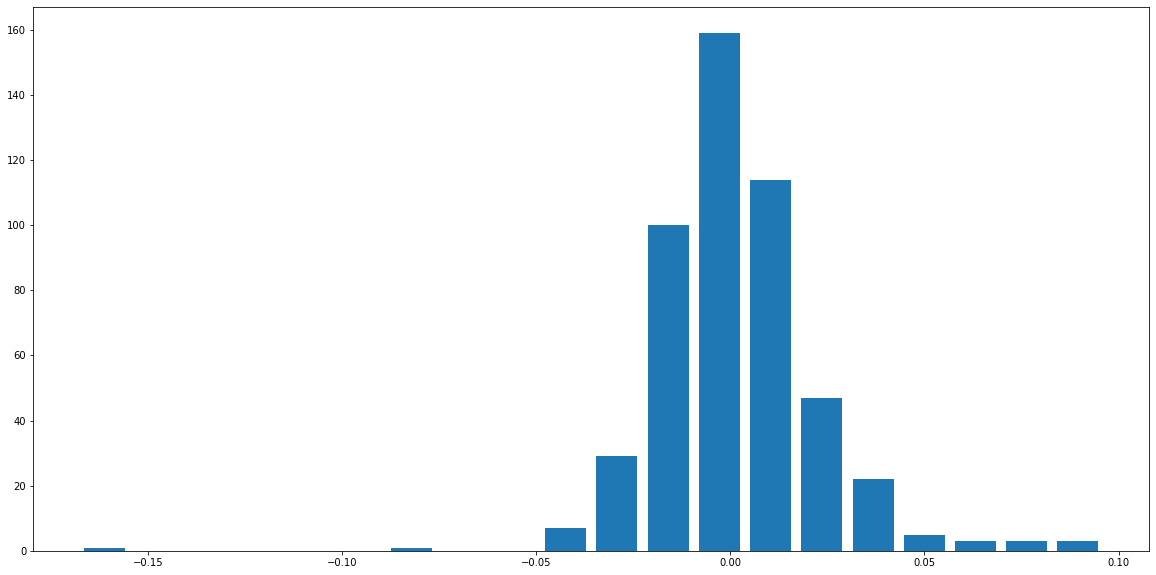

In [21]:
plt.figure(figsize=(20,10))
plt.hist(df['Day_Perc_Change'],rwidth=0.8,bins =20)


# Query 2.6

We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

In [22]:
import pandas as pd
wipro_data = pd.read_csv('wipro_stock_data.csv')
tcs_data = pd.read_csv('tcs_stock_data.csv')
itc_data = pd.read_csv('itc_stock_data.csv')
cub_data = pd.read_csv('cub_stock_data.csv')
airtel_data = pd.read_csv('airtel_stock_data.csv')

In [23]:
wipro_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.8,260.05,255.85,256.5,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.1,258.25,255.00,257.1,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2,WIPRO,EQ,10-Jul-2017,257.70,260.0,268.95,257.00,268.5,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
3,WIPRO,EQ,11-Jul-2017,268.25,266.2,273.50,262.10,264.0,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
4,WIPRO,EQ,12-Jul-2017,263.20,263.7,265.80,261.30,263.4,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46


In [24]:
wipro_data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
490,WIPRO,EQ,01-Jul-2019,280.50,281.60,283.40,280.95,282.15,282.00,282.14,1735921,4.897758e+08,33665,955355,55.03
491,WIPRO,EQ,02-Jul-2019,282.00,282.45,285.00,281.70,284.30,284.25,283.86,2609369,7.407040e+08,38881,1219656,46.74
492,WIPRO,EQ,03-Jul-2019,284.25,284.90,285.60,282.05,282.65,282.85,283.25,1258276,3.564106e+08,21561,505062,40.14
493,WIPRO,EQ,04-Jul-2019,282.85,283.00,284.90,282.00,283.60,283.85,283.77,1628331,4.620724e+08,24896,961449,59.05
494,WIPRO,EQ,05-Jul-2019,283.85,284.00,284.55,271.00,271.75,271.85,275.86,4585463,1.264956e+09,69062,2011218,43.86


In [25]:
tcs_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,06-Jul-2017,2356.00,2359.0,2361.90,2340.1,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
1,TCS,EQ,07-Jul-2017,2347.55,2350.0,2356.45,2325.5,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2,TCS,EQ,10-Jul-2017,2331.95,2341.0,2444.90,2341.0,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
3,TCS,EQ,11-Jul-2017,2434.95,2426.0,2514.80,2426.0,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
4,TCS,EQ,12-Jul-2017,2475.80,2482.5,2483.30,2430.1,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00


In [26]:
tcs_data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
490,TCS,EQ,01-Jul-2019,2227.20,2235.0,2255.0,2206.60,2233.05,2239.55,2237.15,2769940,6.196759e+09,129268,1579799,57.03
491,TCS,EQ,02-Jul-2019,2239.55,2244.9,2257.0,2216.45,2254.30,2252.10,2237.79,1771746,3.964797e+09,97184,816451,46.08
492,TCS,EQ,03-Jul-2019,2252.10,2252.2,2258.8,2232.00,2234.00,2237.65,2242.16,1656881,3.714997e+09,87941,739089,44.61
493,TCS,EQ,04-Jul-2019,2237.65,2234.0,2252.0,2230.10,2241.00,2242.65,2241.04,984140,2.205502e+09,59990,352899,35.86
494,TCS,EQ,05-Jul-2019,2242.65,2247.0,2250.0,2140.00,2166.85,2163.10,2179.39,4088470,8.910375e+09,160276,1736073,42.46


In [27]:
tcs_data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,4.950000e+02,495.000000
mean,2365.776768,2364.439091,2389.739798,2340.637475,2365.129697,2365.387071,2365.536747,2.261750e+06,5.119670e+09,100423.989899,1.226152e+06,55.854788
std,465.059909,462.612829,471.726527,459.447602,464.695459,465.148930,466.162215,2.572893e+06,6.634098e+09,56619.297343,1.600848e+06,12.076135
min,1721.600000,1723.000000,1734.900000,1711.150000,1723.000000,1721.600000,1725.850000,4.341100e+04,1.120856e+08,2351.000000,1.386900e+04,21.480000
25%,1987.975000,1989.650000,2006.000000,1973.500000,1988.925000,1987.975000,1988.840000,1.039764e+06,2.716535e+09,57182.500000,5.900550e+05,47.040000
50%,2227.200000,2204.900000,2247.650000,2185.500000,2214.700000,2215.400000,2219.980000,1.834334e+06,4.196846e+09,94374.000000,9.388060e+05,55.300000
75%,2636.275000,2633.700000,2667.475000,2616.775000,2635.000000,2636.275000,2641.095000,2.750824e+06,5.920394e+09,132733.500000,1.514823e+06,65.550000
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+11,482657.000000,3.155626e+07,85.180000


In [28]:
tcs_data.isna()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
491,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
492,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
493,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
itc_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,06-Jul-2017,331.05,334.3,338.75,331.30,337.1,337.10,336.17,13429462,4.514575e+09,122886,8156576,60.74
1,ITC,EQ,07-Jul-2017,337.10,338.0,338.20,333.05,334.5,334.30,334.92,9919790,3.322371e+09,91378,6752966,68.08
2,ITC,EQ,10-Jul-2017,334.30,341.0,367.70,331.00,333.0,333.30,333.45,1427399,4.759600e+08,11885,679722,47.62
3,ITC,EQ,11-Jul-2017,333.30,335.0,335.05,330.00,330.2,330.40,331.28,8336685,2.761738e+09,85756,6032829,72.36
4,ITC,EQ,12-Jul-2017,330.40,328.4,333.60,327.40,329.8,328.85,329.19,10249263,3.373964e+09,90432,7048111,68.77


In [30]:
itc_data.isna()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
491,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
492,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
493,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
itc_data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
490,ITC,EQ,01-Jul-2019,273.85,274.40,276.25,274.15,275.20,274.95,275.18,5042447,1.387580e+09,59587,2733563,54.21
491,ITC,EQ,02-Jul-2019,274.95,275.35,275.65,273.20,273.55,273.85,273.97,9976439,2.733288e+09,91998,7785650,78.04
492,ITC,EQ,03-Jul-2019,273.85,274.30,277.55,272.15,277.20,276.70,273.97,18120809,4.964575e+09,96803,13196093,72.82
493,ITC,EQ,04-Jul-2019,276.70,277.45,278.25,275.20,277.80,277.65,276.63,9697597,2.682609e+09,98989,6642736,68.50
494,ITC,EQ,05-Jul-2019,277.65,277.65,281.85,268.00,280.35,279.45,276.25,37047327,1.023441e+10,218676,20876681,56.35


In [32]:
itc_data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,4.950000e+02,495.000000
mean,279.823232,280.263131,282.641919,277.280101,279.718788,279.718990,279.890343,1.206087e+07,3.387857e+09,102619.642424,7.585781e+06,62.846545
std,16.008592,16.037011,16.422438,15.500951,15.869474,15.841474,15.795567,9.422216e+06,2.703627e+09,49729.962514,5.754111e+06,8.847686
min,251.600000,250.000000,253.250000,250.000000,251.350000,251.600000,251.960000,9.571390e+05,2.678039e+08,10947.000000,5.829560e+05,34.830000
25%,267.725000,268.000000,270.675000,265.975000,267.750000,267.725000,268.005000,7.729517e+06,2.119795e+09,73222.000000,4.672324e+06,56.465000
50%,277.000000,277.900000,280.200000,274.650000,276.850000,277.000000,277.180000,9.867353e+06,2.734310e+09,94744.000000,6.378419e+06,63.100000
75%,288.775000,289.925000,291.725000,286.275000,288.850000,288.600000,289.090000,1.352194e+07,3.831967e+09,119451.000000,8.924285e+06,69.320000
max,338.750000,341.000000,367.700000,334.800000,339.250000,338.750000,337.110000,1.494797e+08,4.254992e+10,667965.000000,8.629348e+07,86.810000


In [33]:
cub_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CUB,EQ,06-Jul-2017,179.60,179.25,181.00,178.8,180.1,180.00,180.04,513327,9.241908e+07,4265,457813,89.19
1,CUB,EQ,07-Jul-2017,180.00,182.00,182.75,179.4,182.2,181.55,181.40,150843,2.736324e+07,2074,88526,58.69
2,CUB,EQ,10-Jul-2017,181.55,180.00,185.35,180.0,184.8,184.80,184.11,90882,1.673227e+07,776,68791,75.69
3,CUB,EQ,11-Jul-2017,184.80,186.90,187.60,182.1,183.0,183.50,182.90,1138652,2.082593e+08,5030,987514,86.73
4,CUB,EQ,12-Jul-2017,183.50,184.40,184.75,182.3,182.5,183.05,183.39,313207,5.743804e+07,3905,244864,78.18


In [34]:
cub_data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
490,CUB,EQ,01-Jul-2019,218.05,218.50,219.15,214.70,217.90,218.10,217.07,210062,4.559752e+07,3858,103153,49.11
491,CUB,EQ,02-Jul-2019,218.10,217.95,218.00,215.10,215.80,215.80,216.57,184540,3.996587e+07,8593,107555,58.28
492,CUB,EQ,03-Jul-2019,215.80,217.95,218.00,212.65,212.85,213.45,215.78,954745,2.060188e+08,5585,884516,92.64
493,CUB,EQ,04-Jul-2019,213.45,212.95,213.75,210.20,210.25,210.75,212.14,1026703,2.178076e+08,4284,911802,88.81
494,CUB,EQ,05-Jul-2019,210.75,211.00,211.40,203.90,206.10,205.95,208.09,1406371,2.926456e+08,16658,1139576,81.03


In [35]:
cub_data.isna()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
491,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
492,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
493,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
cub_data.dropna()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CUB,EQ,06-Jul-2017,179.60,179.25,181.00,178.80,180.10,180.00,180.04,513327,9.241908e+07,4265,457813,89.19
1,CUB,EQ,07-Jul-2017,180.00,182.00,182.75,179.40,182.20,181.55,181.40,150843,2.736324e+07,2074,88526,58.69
2,CUB,EQ,10-Jul-2017,181.55,180.00,185.35,180.00,184.80,184.80,184.11,90882,1.673227e+07,776,68791,75.69
3,CUB,EQ,11-Jul-2017,184.80,186.90,187.60,182.10,183.00,183.50,182.90,1138652,2.082593e+08,5030,987514,86.73
4,CUB,EQ,12-Jul-2017,183.50,184.40,184.75,182.30,182.50,183.05,183.39,313207,5.743804e+07,3905,244864,78.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,CUB,EQ,01-Jul-2019,218.05,218.50,219.15,214.70,217.90,218.10,217.07,210062,4.559752e+07,3858,103153,49.11
491,CUB,EQ,02-Jul-2019,218.10,217.95,218.00,215.10,215.80,215.80,216.57,184540,3.996587e+07,8593,107555,58.28
492,CUB,EQ,03-Jul-2019,215.80,217.95,218.00,212.65,212.85,213.45,215.78,954745,2.060188e+08,5585,884516,92.64
493,CUB,EQ,04-Jul-2019,213.45,212.95,213.75,210.20,210.25,210.75,212.14,1026703,2.178076e+08,4284,911802,88.81


In [37]:
cub_data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,4.950000e+02,495.000000
mean,180.039697,180.346869,182.444343,177.469293,180.027879,180.092929,179.919030,7.019912e+05,1.270999e+08,10405.818182,5.161917e+05,69.513414
std,14.916317,14.846860,14.901200,14.962152,14.941049,14.961694,15.000511,6.818685e+05,1.237216e+08,8055.885085,5.681209e+05,12.479551
min,149.700000,150.300000,156.300000,147.000000,149.050000,149.700000,150.710000,5.479400e+04,9.092310e+06,776.000000,3.094500e+04,21.000000
25%,168.925000,169.075000,171.550000,165.475000,168.650000,168.925000,168.700000,2.951835e+05,5.206336e+07,4354.000000,1.840175e+05,61.095000
50%,178.750000,179.300000,180.500000,176.000000,178.950000,178.750000,178.740000,4.919630e+05,8.815257e+07,8150.000000,3.438090e+05,69.600000
75%,187.975000,188.525000,190.150000,185.575000,187.975000,188.025000,188.105000,8.792485e+05,1.568653e+08,14073.500000,6.458105e+05,78.490000
max,218.100000,219.000000,220.500000,216.500000,218.000000,218.100000,217.920000,6.759015e+06,1.123015e+09,54210.000000,6.495945e+06,96.110000


In [38]:
airtel_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,06-Jul-2017,376.30,376.55,382.85,373.95,381.20,381.30,379.89,2162556,8.215367e+08,28573,1129739,52.24
1,BHARTIARTL,EQ,07-Jul-2017,381.30,384.00,387.55,383.00,387.55,385.90,385.28,4371065,1.684069e+09,37883,3261760,74.62
2,BHARTIARTL,EQ,10-Jul-2017,385.90,388.10,410.15,388.00,405.00,405.70,404.08,1901518,7.683562e+08,14555,881739,46.37
3,BHARTIARTL,EQ,11-Jul-2017,405.70,404.15,408.90,393.45,394.45,395.45,401.71,5565524,2.235742e+09,68716,3113596,55.94
4,BHARTIARTL,EQ,12-Jul-2017,395.45,397.80,402.30,394.45,399.00,397.10,397.28,2608465,1.036278e+09,39662,1147573,43.99


In [39]:
airtel_data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
493,BHARTIARTL,EQ,01-Jul-2019,346.65,347.00,349.85,345.15,348.45,348.50,347.66,3405198,1.183867e+09,74444,1664891,48.89
494,BHARTIARTL,EQ,02-Jul-2019,348.50,349.00,354.50,347.35,352.70,353.60,351.74,3745884,1.317578e+09,50799,1460631,38.99
495,BHARTIARTL,EQ,03-Jul-2019,353.60,352.90,356.50,349.75,352.90,353.20,354.15,8317090,2.945468e+09,50960,5653437,67.97
496,BHARTIARTL,EQ,04-Jul-2019,353.20,353.35,365.00,353.00,362.10,362.75,361.71,8407402,3.041005e+09,86438,3971490,47.24
497,BHARTIARTL,EQ,05-Jul-2019,362.75,362.75,371.15,360.50,364.85,364.80,365.11,6751716,2.465131e+09,75154,3203297,47.44


In [40]:
airtel_data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,4.980000e+02,498.000000,4.980000e+02,498.000000
mean,383.269679,383.569277,389.433534,377.146185,383.308333,383.243574,383.236305,6.549260e+06,2.537298e+09,71898.847390,2.824802e+06,43.075924
std,63.814149,64.147477,64.609360,63.264864,63.975773,63.821050,63.928989,4.911715e+06,2.159942e+09,39596.290741,2.493522e+06,15.694302
min,285.350000,283.050000,290.000000,276.850000,285.250000,285.350000,283.700000,1.210000e+05,5.034205e+07,1.000000,2.191000e+04,7.920000
25%,333.187500,332.925000,338.900000,328.362500,332.862500,333.187500,332.950000,3.730548e+06,1.367261e+09,47546.250000,1.344787e+06,31.527500
50%,375.650000,374.975000,381.575000,370.425000,376.000000,375.500000,375.895000,5.402215e+06,1.993285e+09,63795.500000,2.110406e+06,42.340000
75%,416.475000,416.387500,422.475000,411.562500,417.100000,416.475000,416.507500,7.850458e+06,3.020456e+09,86329.500000,3.551934e+06,53.997500
max,543.200000,544.950000,564.800000,537.300000,547.500000,543.200000,552.360000,4.536623e+07,2.236535e+10,312598.000000,2.579218e+07,100.000000


In [41]:
airtel_data.isna()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
wipro_filtered_data = wipro_data[wipro_data.Series == 'EQ']
wipro_filtered_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.8,260.05,255.85,256.5,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.1,258.25,255.00,257.1,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2,WIPRO,EQ,10-Jul-2017,257.70,260.0,268.95,257.00,268.5,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
3,WIPRO,EQ,11-Jul-2017,268.25,266.2,273.50,262.10,264.0,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
4,WIPRO,EQ,12-Jul-2017,263.20,263.7,265.80,261.30,263.4,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46


In [43]:
tcs_filtered_data = tcs_data[tcs_data.Series == 'EQ']
tcs_filtered_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,06-Jul-2017,2356.00,2359.0,2361.90,2340.1,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
1,TCS,EQ,07-Jul-2017,2347.55,2350.0,2356.45,2325.5,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2,TCS,EQ,10-Jul-2017,2331.95,2341.0,2444.90,2341.0,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
3,TCS,EQ,11-Jul-2017,2434.95,2426.0,2514.80,2426.0,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
4,TCS,EQ,12-Jul-2017,2475.80,2482.5,2483.30,2430.1,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00


In [44]:
itc_filtered_data = itc_data[itc_data.Series == 'EQ']
itc_filtered_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,06-Jul-2017,331.05,334.3,338.75,331.30,337.1,337.10,336.17,13429462,4.514575e+09,122886,8156576,60.74
1,ITC,EQ,07-Jul-2017,337.10,338.0,338.20,333.05,334.5,334.30,334.92,9919790,3.322371e+09,91378,6752966,68.08
2,ITC,EQ,10-Jul-2017,334.30,341.0,367.70,331.00,333.0,333.30,333.45,1427399,4.759600e+08,11885,679722,47.62
3,ITC,EQ,11-Jul-2017,333.30,335.0,335.05,330.00,330.2,330.40,331.28,8336685,2.761738e+09,85756,6032829,72.36
4,ITC,EQ,12-Jul-2017,330.40,328.4,333.60,327.40,329.8,328.85,329.19,10249263,3.373964e+09,90432,7048111,68.77


In [45]:
airtel_filtered_data = airtel_data[airtel_data.Series == 'EQ']
airtel_filtered_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,06-Jul-2017,376.30,376.55,382.85,373.95,381.20,381.30,379.89,2162556,8.215367e+08,28573,1129739,52.24
1,BHARTIARTL,EQ,07-Jul-2017,381.30,384.00,387.55,383.00,387.55,385.90,385.28,4371065,1.684069e+09,37883,3261760,74.62
2,BHARTIARTL,EQ,10-Jul-2017,385.90,388.10,410.15,388.00,405.00,405.70,404.08,1901518,7.683562e+08,14555,881739,46.37
3,BHARTIARTL,EQ,11-Jul-2017,405.70,404.15,408.90,393.45,394.45,395.45,401.71,5565524,2.235742e+09,68716,3113596,55.94
4,BHARTIARTL,EQ,12-Jul-2017,395.45,397.80,402.30,394.45,399.00,397.10,397.28,2608465,1.036278e+09,39662,1147573,43.99


In [46]:
cub_filtered_data = cub_data[cub_data.Series == 'EQ']
cub_filtered_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CUB,EQ,06-Jul-2017,179.60,179.25,181.00,178.8,180.1,180.00,180.04,513327,9.241908e+07,4265,457813,89.19
1,CUB,EQ,07-Jul-2017,180.00,182.00,182.75,179.4,182.2,181.55,181.40,150843,2.736324e+07,2074,88526,58.69
2,CUB,EQ,10-Jul-2017,181.55,180.00,185.35,180.0,184.8,184.80,184.11,90882,1.673227e+07,776,68791,75.69
3,CUB,EQ,11-Jul-2017,184.80,186.90,187.60,182.1,183.0,183.50,182.90,1138652,2.082593e+08,5030,987514,86.73
4,CUB,EQ,12-Jul-2017,183.50,184.40,184.75,182.3,182.5,183.05,183.39,313207,5.743804e+07,3905,244864,78.18


In [47]:
import pandas as pd

columns = ['Wipro','TCS','ITC','CUB','Airtel']
close_prices_dataFrame = pd.DataFrame(columns = columns)
close_prices_dataFrame['Wipro'] = wipro_filtered_data['Close Price']
close_prices_dataFrame['TCS'] = tcs_filtered_data['Close Price']
close_prices_dataFrame['ITC'] = itc_filtered_data['Close Price']
close_prices_dataFrame['CUB'] = cub_filtered_data['Close Price']
close_prices_dataFrame['Airtel'] = airtel_filtered_data['Close Price']
close_prices_dataFrame.dropna()

,Wipro,TCS,ITC,CUB,Airtel
0,257.75,2347.55,337.10,180.00,381.30
1,257.70,2331.95,334.30,181.55,385.90
2,268.25,2434.95,333.30,184.80,405.70
3,263.20,2475.80,330.40,183.50,395.45
4,263.80,2439.45,328.85,183.05,397.10
...,...,...,...,...,...
490,282.00,2239.55,274.95,218.10,345.55
491,284.25,2252.10,273.85,215.80,348.65
492,282.85,2237.65,276.70,213.45,346.65
493,283.85,2242.65,277.65,210.75,348.50


In [48]:
close_prices_dataFrame.dropna().head()


,Wipro,TCS,ITC,CUB,Airtel
0,257.75,2347.55,337.10,180.00,381.30
1,257.70,2331.95,334.30,181.55,385.90
2,268.25,2434.95,333.30,184.80,405.70
3,263.20,2475.80,330.40,183.50,395.45
4,263.80,2439.45,328.85,183.05,397.10


In [49]:
close_prices_dataFrame.dropna().tail()

,Wipro,TCS,ITC,CUB,Airtel
490,282.00,2239.55,274.95,218.10,345.55
491,284.25,2252.10,273.85,215.80,348.65
492,282.85,2237.65,276.70,213.45,346.65
493,283.85,2242.65,277.65,210.75,348.50
494,271.85,2163.10,279.45,205.95,353.60


In [50]:
close_prices_dataFrame.dropna().describe()

,Wipro,TCS,ITC,CUB,Airtel
count,492.000000,492.000000,492.000000,492.000000,492.000000
mean,298.107622,2364.932520,279.743699,180.109451,383.349593
std,27.545774,465.738077,15.851255,14.940531,64.110209
min,254.550000,1721.600000,251.600000,149.700000,285.350000
25%,282.425000,1988.037500,267.787500,168.937500,332.737500
50%,291.900000,2206.925000,277.025000,178.775000,375.650000
75%,316.037500,2635.912500,288.575000,188.012500,416.825000
max,387.650000,3603.700000,338.750000,218.100000,543.200000


In [51]:
pct_change_dataFrame = close_prices_dataFrame.pct_change().fillna(0)
pct_change_dataFrame.dropna()

,Wipro,TCS,ITC,CUB,Airtel
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000194,-0.006645,-0.008306,0.008611,0.012064
2,0.040939,0.044169,-0.002991,0.017901,0.051309
3,-0.018826,0.016777,-0.008701,-0.007035,-0.025265
4,0.002280,-0.014682,-0.004691,-0.002452,0.004172
...,...,...,...,...,...
490,0.005348,0.005545,0.004017,0.000229,-0.008749
491,0.007979,0.005604,-0.004001,-0.010546,0.008971
492,-0.004925,-0.006416,0.010407,-0.010890,-0.005736
493,0.003535,0.002234,0.003433,-0.012649,0.005337


In [52]:
pct_change_dataFrame.dropna().describe()

,Wipro,TCS,ITC,CUB,Airtel
count,495.000000,495.000000,495.000000,495.000000,495.000000
mean,0.000274,0.000341,-0.000287,0.000393,0.000075
std,0.017669,0.027039,0.013460,0.015561,0.021444
min,-0.236936,-0.504553,-0.124865,-0.071925,-0.094161
25%,-0.005687,-0.006477,-0.007413,-0.008011,-0.012045
50%,0.000538,0.000913,-0.000711,0.000000,-0.001100
75%,0.008054,0.008701,0.006516,0.008483,0.010436
max,0.062790,0.066214,0.053447,0.071779,0.104757


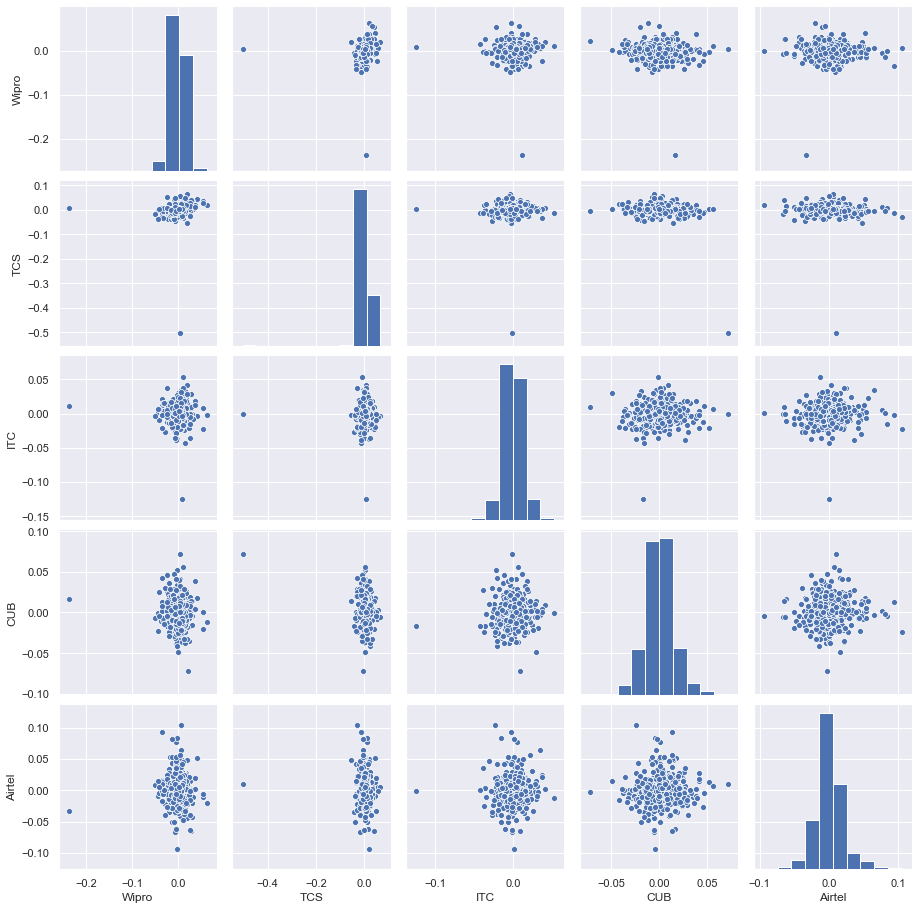

In [111]:
import seaborn as sns

sns.set(color_codes='bright')
sns.pairplot(pct_change_dataFrame,)


# Query 2.7

Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read. You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values. Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [54]:
import matplotlib.pyplot as plt
rolling_avg_wipro = pct_change_dataFrame['Wipro'].rolling(7).mean()
rolling_avg_wipro

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
490   -0.002460
491   -0.000773
492   -0.000502
493   -0.000701
494   -0.007166
Name: Wipro, Length: 495, dtype: float64

In [55]:
rolling_avg_wipro.head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6     0.001320
7     0.005168
8     0.006347
9     0.001614
10    0.003276
11    0.011920
12    0.014532
13    0.015824
14    0.011877
Name: Wipro, dtype: float64

In [56]:
stand_wipro = rolling_avg_wipro.fillna(0).std()
stand_wipro

0.007472522152842465

In [57]:
rolling_avg_wipro.describe()

count    489.000000
mean       0.000311
std        0.007518
min       -0.053150
25%       -0.002423
50%        0.000763
75%        0.004173
max        0.017214
Name: Wipro, dtype: float64

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
crrDate = pd.to_datetime(wipro_filtered_data['Date'])
crrDate




0     2017-07-06
1     2017-07-07
2     2017-07-10
3     2017-07-11
4     2017-07-12
         ...    
490   2019-07-01
491   2019-07-02
492   2019-07-03
493   2019-07-04
494   2019-07-05
Name: Date, Length: 495, dtype: datetime64[ns]

In [80]:
wipro_filter = rolling_avg_wipro.fillna(0).tolist()
wipro_filter


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.001320087465257009,
 0.005168461527215824,
 0.00634716827869773,
 0.001613970422174149,
 0.0032757996409552253,
 0.01192017541135028,
 0.014531564004734083,
 0.01582387708793065,
 0.01187682774166367,
 0.0108986344419589,
 0.009462864180599273,
 0.010193885938317144,
 0.004368735688426487,
 0.0011373731093348002,
 -0.00016796835457325417,
 7.895024643202384e-05,
 -0.0009083438992817701,
 -0.0007615772197436968,
 -0.0009123998725787238,
 -0.00323455010089654,
 -0.001981511091558324,
 -0.00028793095247000737,
 0.0002818252356608137,
 0.00030800501946748327,
 0.0003579095502578289,
 0.0006069262938517284,
 0.0010503887325208033,
 0.0001588931253369008,
 0.0004550717779603681,
 0.00037879406205533684,
 0.001191678550036974,
 0.001536639023972719,
 0.005610571550017619,
 0.0030786697718891342,
 0.003611325350495433,
 0.003882866097348479,
 0.0032171145114773575,
 0.004033727667093566,
 0.004553312253353504,
 0.000986732351201915,
 0.0008055994662128521

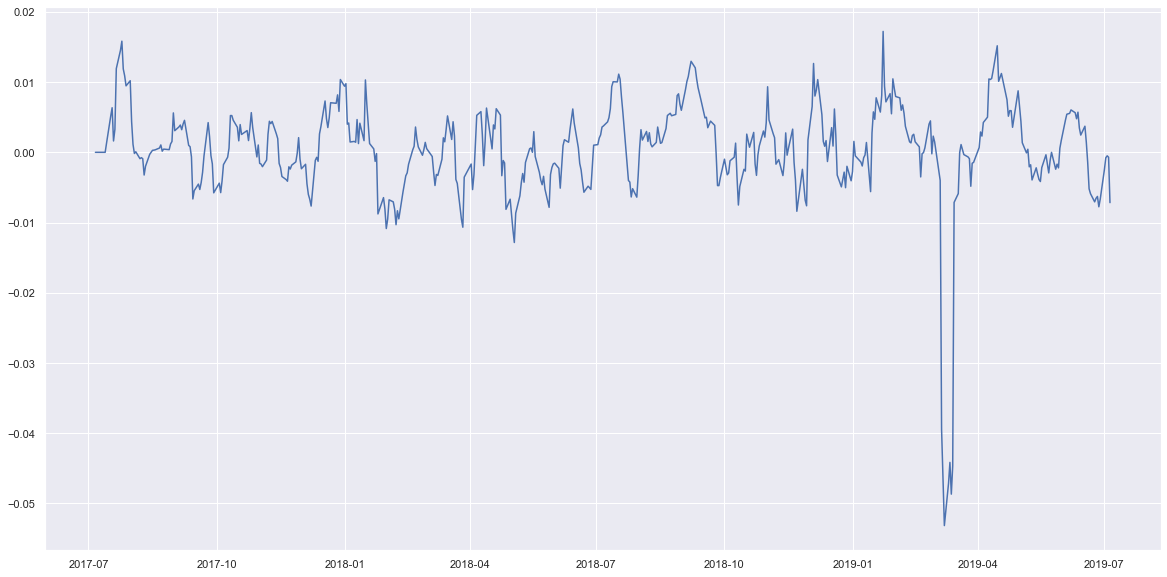

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(crrDate,wipro_filter)
plt.show()

# Query 2.8

Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [82]:
nif_load = pd.read_csv('NIFTY50_data.csv')
nif_load

,Date,Open,High,Low,Close
0,05 Jul 2019,11964.75,11981.75,11797.90,11811.15
1,04 Jul 2019,11928.80,11969.25,11923.65,11946.75
2,03 Jul 2019,11932.15,11945.20,11887.05,11916.75
3,02 Jul 2019,11890.30,11917.45,11814.70,11910.30
4,01 Jul 2019,11839.90,11884.65,11830.80,11865.60
...,...,...,...,...,...
490,12 Jul 2017,9807.30,9824.95,9787.70,9816.10
491,11 Jul 2017,9797.45,9830.05,9778.85,9786.05
492,10 Jul 2017,9719.30,9782.15,9646.45,9771.05
493,07 Jul 2017,9670.35,9684.25,9642.65,9665.80


In [83]:
nif_load.isna()

,Date,Open,High,Low,Close
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
490,False,False,False,False,False
491,False,False,False,False,False
492,False,False,False,False,False
493,False,False,False,False,False


In [84]:
nif_load.describe()

,Open,High,Low,Close
count,495.000000,495.000000,495.000000,495.000000
mean,10751.940202,10793.314646,10690.846364,10742.551010
std,578.979690,581.244343,572.550490,576.495874
min,9653.600000,9684.250000,9639.950000,9665.800000
25%,10331.700000,10370.900000,10269.950000,10324.100000
50%,10699.700000,10741.050000,10628.650000,10684.650000
75%,11078.650000,11117.725000,11010.075000,11069.525000
max,12052.650000,12103.050000,12005.850000,12088.550000


<Figure size 1440x720 with 0 Axes>

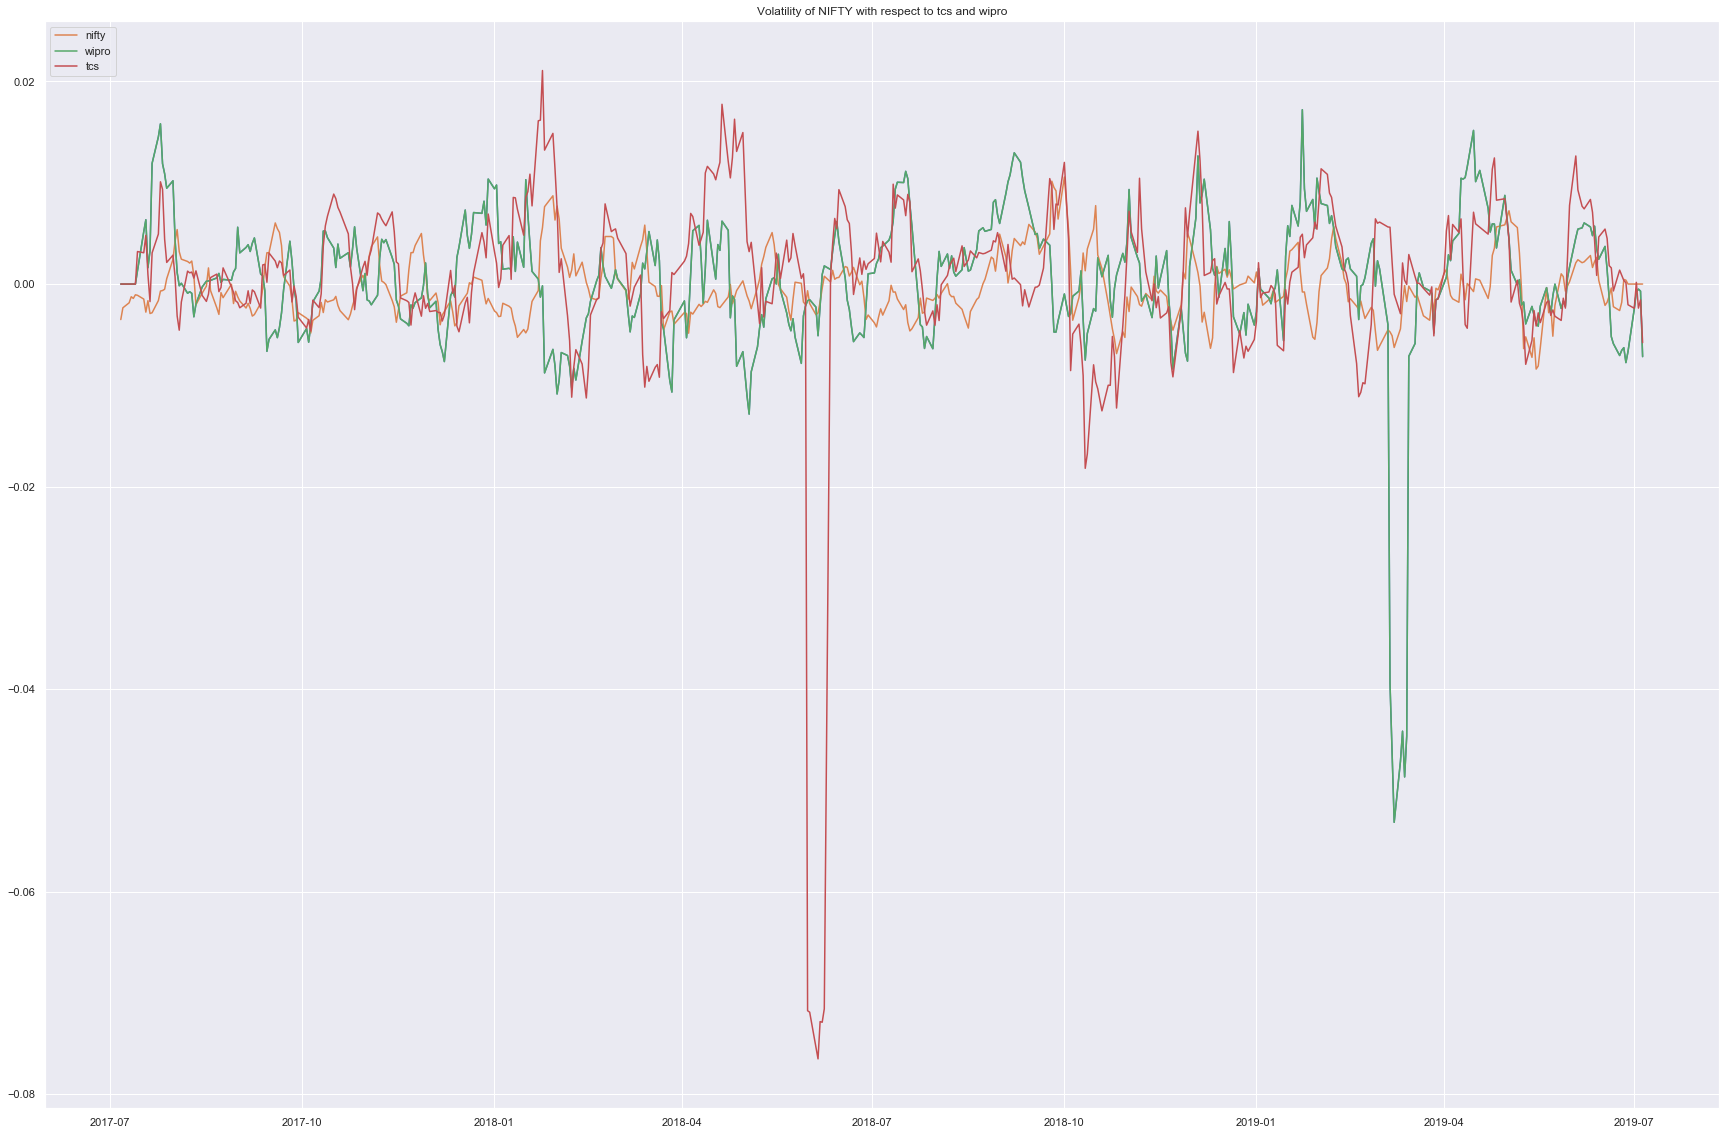

In [96]:
nif_close_price = nif_load['Close']
nif_change = nif_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifDate = pd.to_datetime(nif_load['Date'])
nifDate = nifDate.tolist()
plt.figure(figsize=(20,10))

tcs_Date = pd.to_datetime(tcs_filtered_data['Date'])
tcsLis = tcs_Date
tcs_close_price = tcs_filtered_data['Close Price']
tcs_change = tcs_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.figure(figsize=(30,20))
plt.plot(tcsLis,rolling_avg_wipro.fillna(0).tolist())

plt.title("Volatility of NIFTY with respect to tcs and wipro")
plt.plot(nifDate,nif_change.tolist(),label = 'nifty')


plt.plot(crrLis,rolling_avg_wipro.fillna(0).tolist(),label = 'wipro')

plt.plot(tcsLis,tcs_change,label = 'tcs')
         
         
plt.legend(loc='upper left')
plt.show()

# Query 2.9



Trade Calls - Using Simple Moving Averages. Study about moving averages here.Plot the 21 day and 34 day Moving average with the average price and decide a Call ! Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. One of the most widely used technical indicators.

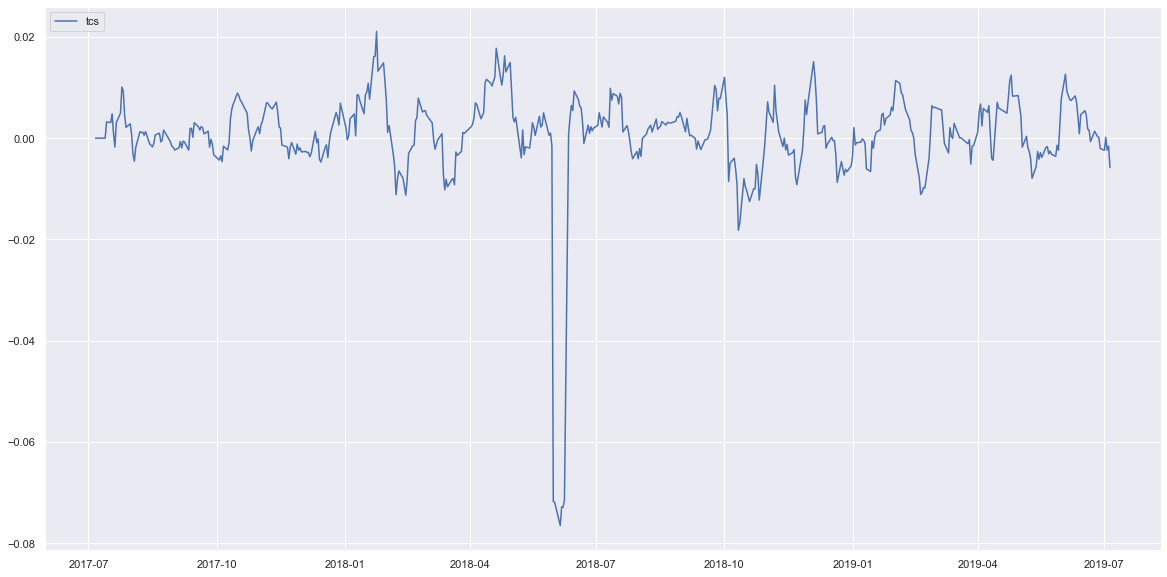

In [99]:
plt.figure(figsize=(20,10))
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

In [103]:
import numpy as np
short_window = 21
long_window = 34

signals = pd.DataFrame(index=tcs_filtered_data.index)
signals['signal'] = 0.0


signals['short_mavg'] = tcs_filtered_data['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

signals['long_mavg'] = tcs_filtered_data['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()


signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)


signals['positions'] = signals['signal'].diff()
print(signals)

     signal   short_mavg    long_mavg  positions
0       0.0  2347.550000  2347.550000        NaN
1       0.0  2339.750000  2339.750000        0.0
2       0.0  2371.483333  2371.483333        0.0
3       0.0  2397.562500  2397.562500        0.0
4       0.0  2405.940000  2405.940000        0.0
..      ...          ...          ...        ...
490     1.0  2239.435714  2183.539706        0.0
491     1.0  2242.080952  2188.238235        0.0
492     1.0  2241.859524  2192.422059        0.0
493     1.0  2244.695238  2196.360294        0.0
494     1.0  2244.552381  2198.350000        0.0

[495 rows x 4 columns]


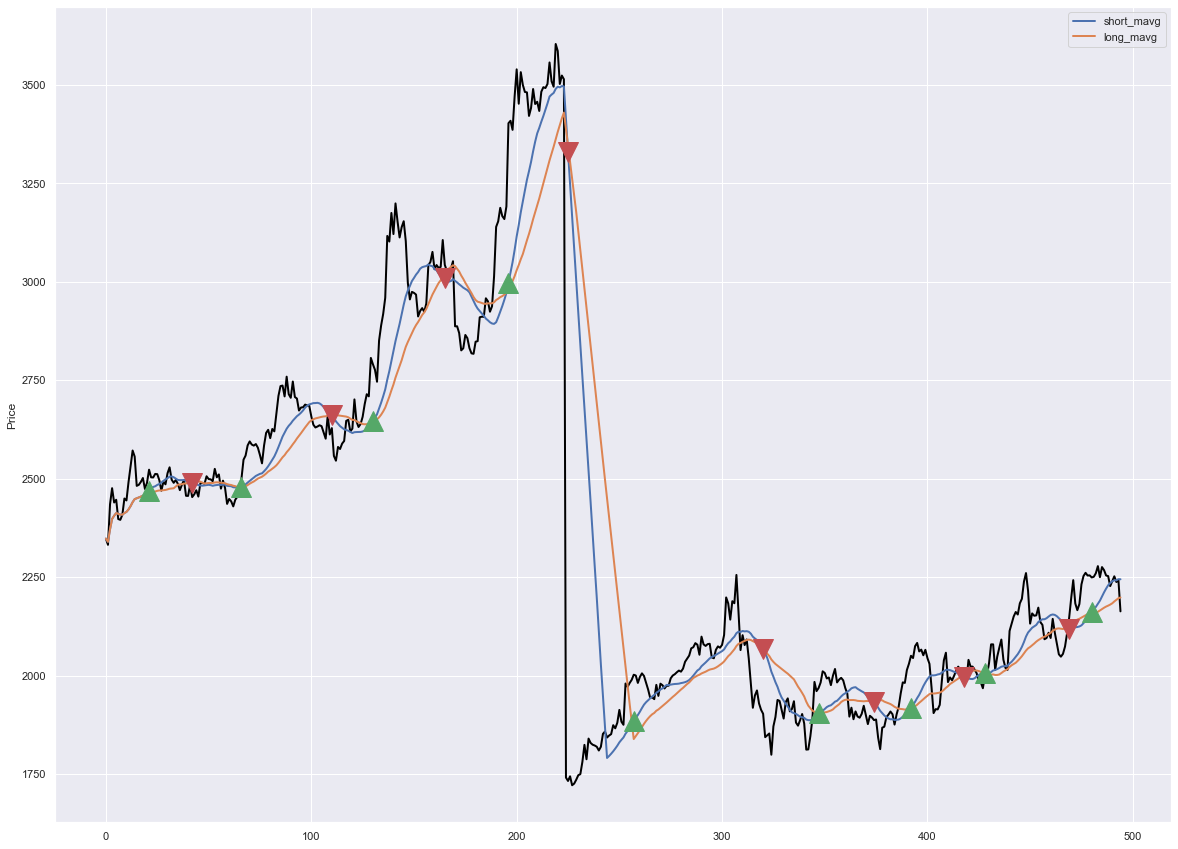

In [106]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,15))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plot the closing price
tcs_filtered_data['Close Price'].plot(ax=ax1, color='black', lw=2.)

#plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

# Query 2.10

Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average The bollinger bands comprise the following data points- The 14 day rolling mean of the closing price (we call it the average) Upper band which is the rolling mean + 2 standard deviations away from the average. Lower band which is the rolling mean - 2 standard deviations away from the average. Average Daily stock price. Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. Save to a new csv file.

<Figure size 1440x1080 with 0 Axes>

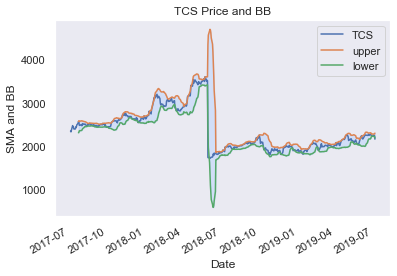

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'TCS'

# read csv file, use date as index and read close as a column
df = pd.read_csv('tcs_stock_data.csv'.format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close Price'],
                 na_values='nan')

# rename the column header with symbol name
df = df.rename(columns={'Close Price': symbol})
df.dropna(inplace=True)

# calculate Simple Moving Average with 14 days window
sma = df.rolling(window=14).mean()

# calculate the standar deviation
rstd = df.rolling(window=14).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
fig = plt.figure(figsize=(20,15))
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()